# To find best fit line we use gradient descent teqnique

# Regularization is a technique in ML which handles large coefficent of ML models

# It alse prevents overfitting by penalizig complex models

Lasso Regularization technique is used for feature selection

Ridge Regularization technique is used to reduce overfitting 

Ridge Regularization technique also resuces computational power

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [17]:
dataset=pd.read_csv(r"C:\Users\HP\Downloads\House Price Prediction Dataset.csv")
dataset.head(3)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746


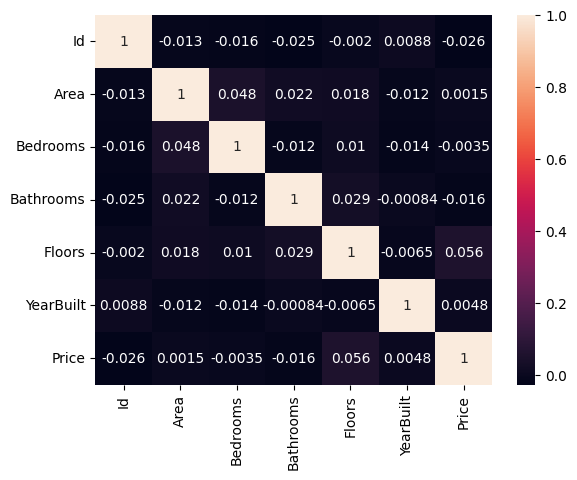

In [18]:
sns.heatmap(data=dataset.corr(numeric_only=True),annot=True)
plt.show()

In [19]:
#split the dataset int0 input and output

In [20]:
x=dataset.iloc[:,:-1]
y=dataset["Price"]

In [21]:
x_encoded=pd.get_dummies(x,drop_first=True)

In [23]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x_encoded)
x_scaled=pd.DataFrame(x_scaled,columns=x_encoded.columns)
x_scaled

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,-1.731185,-1.101471,1.401791,1.305568,1.244151,0.238155,-0.557329,-0.564262,-0.565802,-0.593519,-0.547307,-0.582739,-0.962695
1,-1.729453,1.147485,1.401791,1.305568,1.244151,-0.095942,-0.557329,-0.564262,-0.565802,-0.593519,-0.547307,-0.582739,-0.962695
2,-1.727721,0.622317,-0.704581,-0.498326,1.244151,-0.652770,-0.557329,-0.564262,-0.565802,-0.593519,1.827127,-0.582739,-0.962695
3,-1.725989,-1.405759,0.699667,-0.498326,0.008035,-1.655061,-0.557329,1.772226,-0.565802,1.684865,-0.547307,-0.582739,1.038750
4,-1.724257,1.652574,-1.406705,1.305568,0.008035,0.377363,-0.557329,-0.564262,-0.565802,1.684865,-0.547307,-0.582739,1.038750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.724257,1.705091,1.401791,1.305568,1.244151,-1.070391,-0.557329,1.772226,-0.565802,-0.593519,-0.547307,1.716034,-0.962695
1996,1.725989,0.200638,1.401791,-0.498326,-1.228081,1.602385,-0.557329,1.772226,-0.565802,-0.593519,-0.547307,1.716034,1.038750
1997,1.727721,-1.331618,1.401791,-1.400273,0.008035,-1.627219,1.794271,-0.564262,-0.565802,-0.593519,-0.547307,1.716034,-0.962695
1998,1.729453,0.985301,-0.002457,-1.400273,0.008035,-0.708453,-0.557329,-0.564262,1.767402,-0.593519,-0.547307,-0.582739,1.038750


In [29]:
x_train, x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42)

In [31]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

# Linear Regression

In [34]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
lr.score(x_test_scaled,y_test)*100

-0.6181784611834162

In [68]:
print(mean_squared_error(y_test,lr.predict(x_test_scaled)))
print(mean_absolute_error(y_test,lr.predict(x_test_scaled)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test_scaled))))

78279764120.86243
242867.44926338628
279785.21069002635


In [65]:
lr.coef_


array([ -6892.13473473,   -629.80755047,     75.99992218, -10906.54822111,
        19030.92695025,   4192.57824266,    782.81473738,   4688.80789342,
        -5433.72208016,  10605.82775302,  -5485.85583307,   1916.41044298,
         1107.8669285 ])

In [37]:
x.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage'],
      dtype='str')

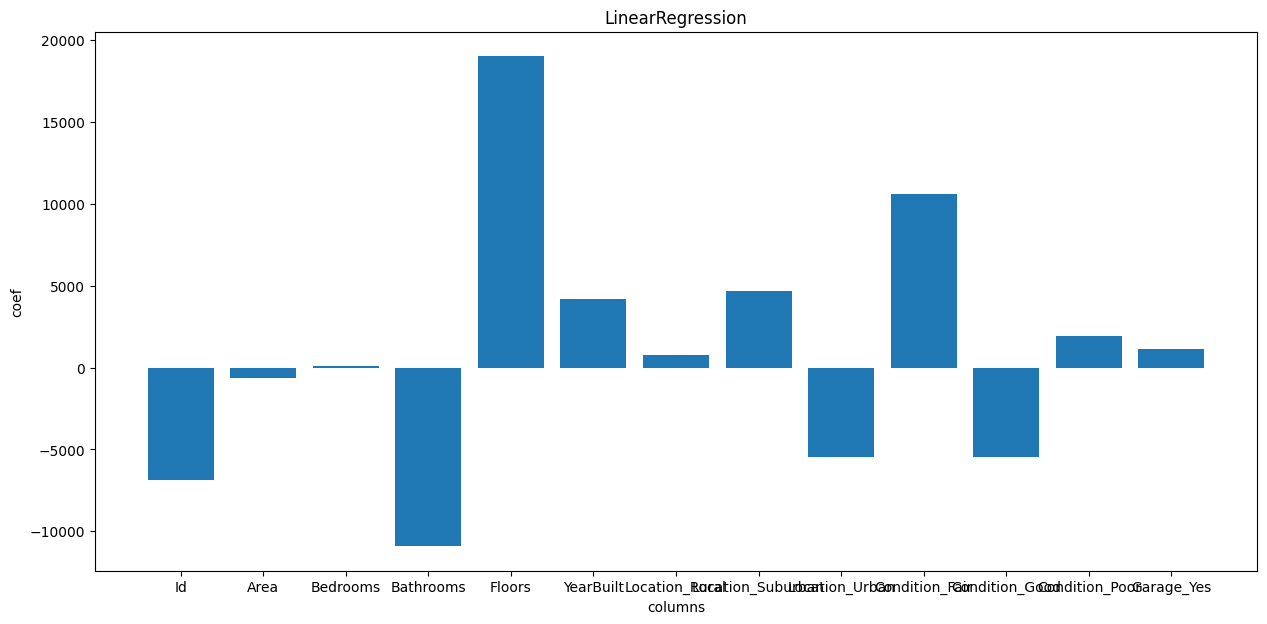

In [46]:
plt.figure(figsize=(15,7))
plt.bar(x_scaled.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Lasso

In [55]:
la=Lasso(alpha=1000)
la.fit(x_train_scaled,y_train)
la.score(x_test_scaled,y_test)*100

-0.470767026770047

In [69]:
print(mean_squared_error(y_test,la.predict(x_test_scaled)))
print(mean_absolute_error(y_test,la.predict(x_test_scaled)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test_scaled))))

78165079751.78444
242778.7264231841
279580.18483394786


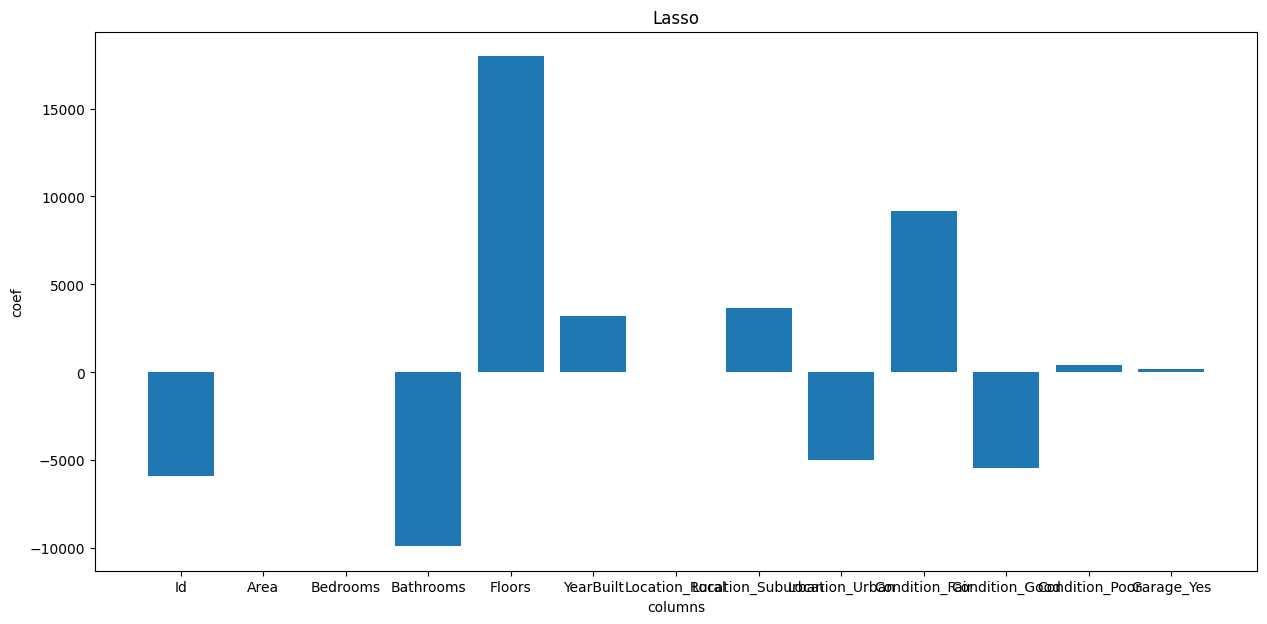

In [56]:
plt.figure(figsize=(15,7))
plt.bar(x_scaled.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Ridge

In [58]:
r1=Ridge(alpha=1000)
r1.fit(x_train_scaled,y_train)
r1.score(x_test_scaled,y_test)*100

-0.16053384495817724

In [70]:
print(mean_squared_error(y_test,r1.predict(x_test_scaled)))
print(mean_absolute_error(y_test,r1.predict(x_test_scaled)))
print(np.sqrt(mean_squared_error(y_test,r1.predict(x_test_scaled))))

77923721970.6548
242547.96850668642
279148.20789439935


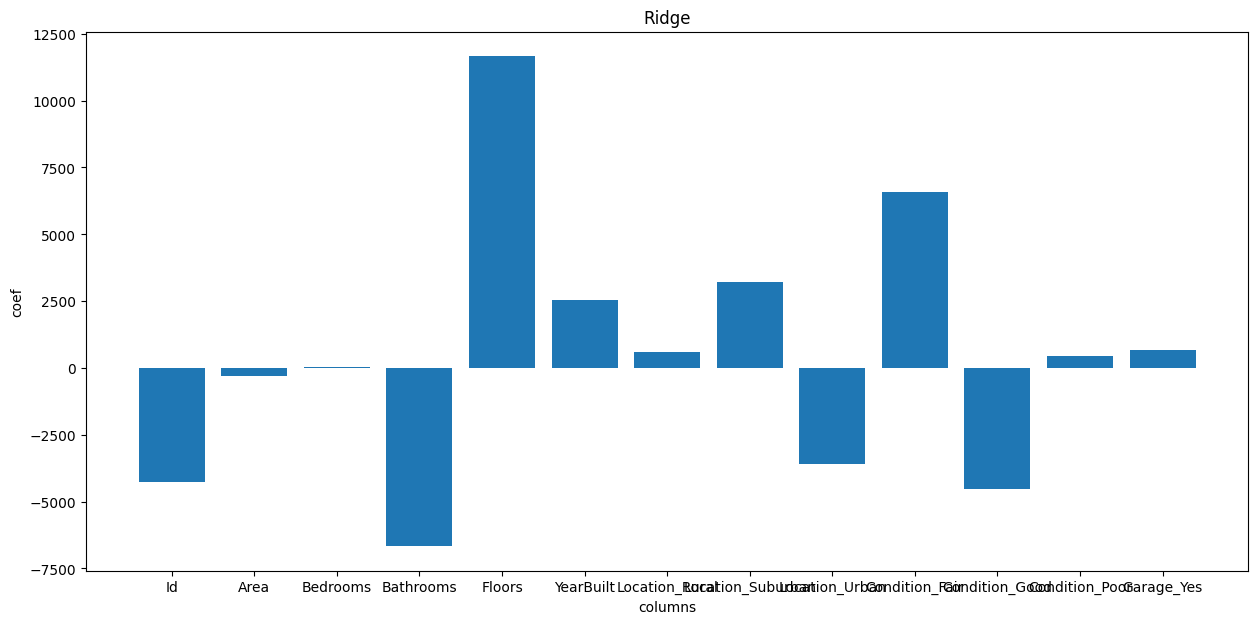

In [59]:
plt.figure(figsize=(15,7))
plt.bar(x_scaled.columns,r1.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [72]:
df=pd.DataFrame({"col_name":x_encoded.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":r1.coef_})

In [73]:
df

,col_name,LinearRegression,Lasso,Ridge
0,Id,-6892.134735,-5891.357956,-4272.630600
1,Area,-629.807550,-0.000000,-307.028747
2,Bedrooms,75.999922,-0.000000,31.664673
3,Bathrooms,-10906.548221,-9884.012235,-6664.546915
4,Floors,19030.926950,17981.751664,11664.655296
5,YearBuilt,4192.578243,3199.686063,2549.204038
6,Location_Rural,782.814737,0.000000,602.184839
7,Location_Suburban,4688.807893,3658.656559,3219.862795
8,Location_Urban,-5433.722080,-5009.296143,-3610.952199
9,Condition_Fair,10605.827753,9167.040113,6563.397200
